In [16]:
import numpy as np
import pandas as pd

# Generating synthetic data
np.random.seed(42)
date_rng = pd.date_range(start='2020-01-01', end='2023-12-01', freq='MS')
sales = np.random.randint(100, 1000, len(date_rng))

# Create a DataFrame to store the data
data = pd.DataFrame({'Date': date_rng, 'Sales': sales})
data.set_index('Date', inplace=True)


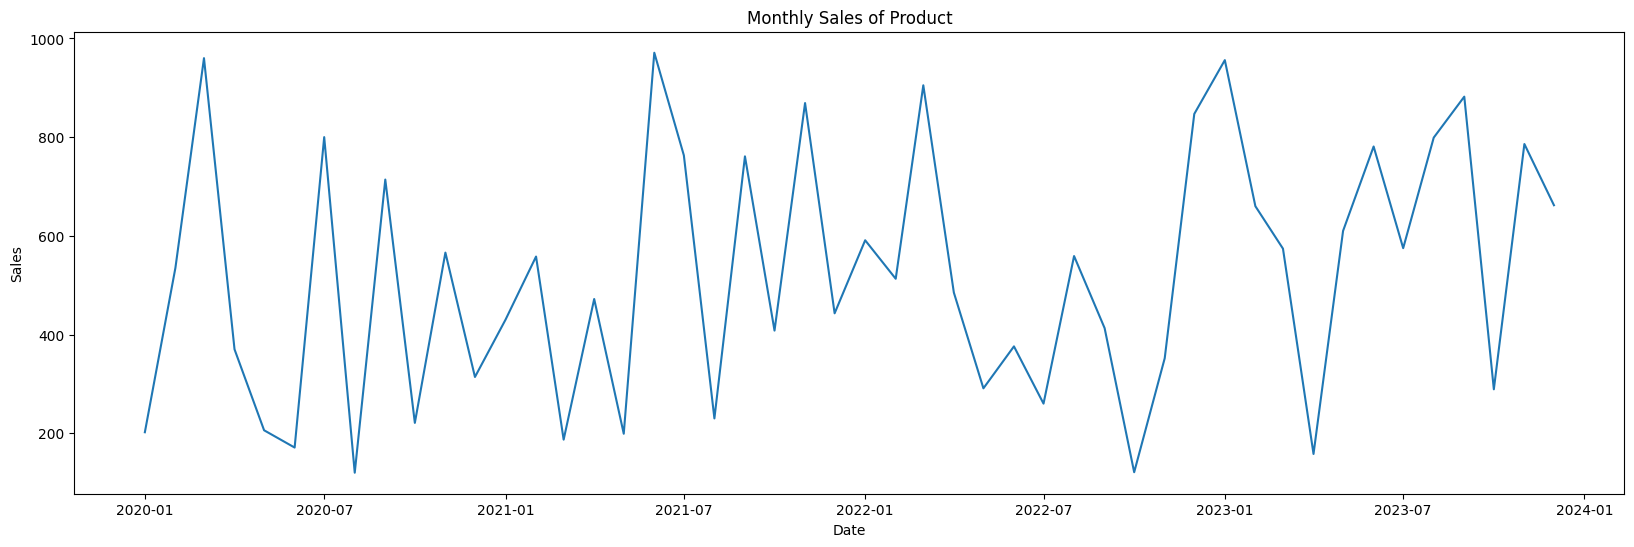

In [18]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(20, 6))
plt.plot(data.index, data['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales of Product')
plt.show()


In [3]:
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity using Augmented Dickey-Fuller test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

# Check stationarity
check_stationarity(data['Sales'])


ADF Statistic: -7.273363146601268
p-value: 1.5672947773193926e-10
Critical Values:
1%: -3.5778480370438146
5%: -2.925338105429433
10%: -2.6007735310095064


In [22]:
# Differencing to make the data stationary
data['Sales_diff'] = data['Sales'] - data['Sales'].shift(1)
data.dropna(inplace=True)

# Check stationarity of differenced data
check_stationarity(data['Sales_diff'])


ADF Statistic: -6.831590844278446
p-value: 1.8876381786502522e-09
Critical Values:
1%: -3.5925042342183704
5%: -2.931549768951162
10%: -2.60406594375338


In [27]:
data['Sales_diff']

Date
2020-02-01    333.0
2020-03-01    425.0
2020-04-01   -590.0
2020-05-01   -164.0
2020-06-01    -35.0
2020-07-01    629.0
2020-08-01   -680.0
2020-09-01    594.0
2020-10-01   -493.0
2020-11-01    345.0
2020-12-01   -252.0
2021-01-01    116.0
2021-02-01    128.0
2021-03-01   -371.0
2021-04-01    285.0
2021-05-01   -273.0
2021-06-01    772.0
2021-07-01   -208.0
2021-08-01   -533.0
2021-09-01    531.0
2021-10-01   -353.0
2021-11-01    461.0
2021-12-01   -426.0
2022-01-01    148.0
2022-02-01    -78.0
2022-03-01    392.0
2022-04-01   -420.0
2022-05-01   -194.0
2022-06-01     85.0
2022-07-01   -116.0
2022-08-01    299.0
2022-09-01   -146.0
2022-10-01   -292.0
2022-11-01    231.0
2022-12-01    495.0
2023-01-01    109.0
2023-02-01   -296.0
2023-03-01    -86.0
2023-04-01   -416.0
2023-05-01    452.0
2023-06-01    171.0
2023-07-01   -206.0
2023-08-01    224.0
2023-09-01     83.0
2023-10-01   -593.0
2023-11-01    497.0
2023-12-01   -124.0
Name: Sales_diff, dtype: float64

In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Create and train the ARIMA model
order = (1, 1, 1)  # (p, d, q) order
model = ARIMA(data['Sales'], order=order)
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


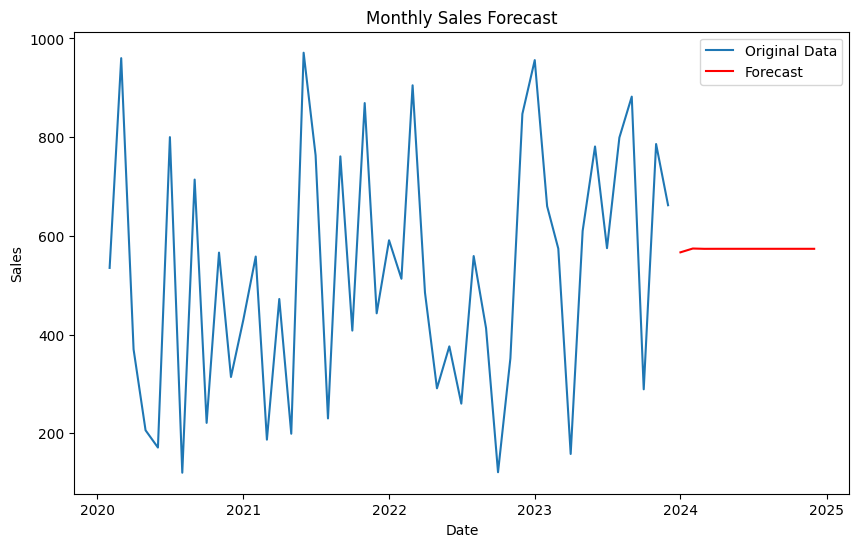

In [7]:
# Forecast future sales
forecast_steps = 12
forecast = results.forecast(steps=forecast_steps)

# Create date range for future forecast
forecast_date_rng = pd.date_range(start='2024-01-01', periods=forecast_steps, freq='MS')

# Create a DataFrame to store the forecast
forecast_data = pd.DataFrame({'Date': forecast_date_rng, 'Forecast': forecast})

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sales'], label='Original Data')
plt.plot(forecast_data['Date'], forecast_data['Forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.show()


In [25]:
forecast_data

,Date,Forecast
2024-01-01,2024-01-01,566.555112
2024-02-01,2024-02-01,574.274654
2024-03-01,2024-03-01,573.650301
2024-04-01,2024-04-01,573.700798
2024-05-01,2024-05-01,573.696714
2024-06-01,2024-06-01,573.697044
2024-07-01,2024-07-01,573.697018
2024-08-01,2024-08-01,573.697020
2024-09-01,2024-09-01,573.697019
2024-10-01,2024-10-01,573.697020


***Follow Sachin M on LinkedIn & GitHub for Open Source bublic resource ***